In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [4]:
gdp = pd.read_csv('Real_GDP_per_capita.csv',thousands=',')

In [5]:
gdp['value'] = gdp['value'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
gdp.head(15)

,name,slug,value,date_of_information,ranking,region
0,Liechtenstein,liechtenstein,139100.0,2009,1,Europe
1,Monaco,monaco,115700.0,2015,2,Europe
2,Luxembourg,luxembourg,115700.0,2021,3,Europe
3,Singapore,singapore,106000.0,2021,4,East and Southeast Asia
4,Ireland,ireland,102500.0,2021,5,Europe
5,Qatar,qatar,92900.0,2021,6,Middle East
6,Isle of Man,isle-of-man,84600.0,2014,7,Europe
7,Bermuda,bermuda,80300.0,2021,8,North America
8,Switzerland,switzerland,71000.0,2021,9,Europe
9,Falkland Islands (Islas Malvinas),falkland-islands-islas-malvinas,70800.0,2015,10,South America


In [11]:
life = pd.read_csv('Life_expectancy_at_birth.csv')

In [12]:
life.head(15)

,name,slug,years,date_of_information,ranking,region
0,Monaco,monaco,89.6,2023,1,Europe
1,Singapore,singapore,86.5,2023,2,East and Southeast Asia
2,Macau,macau,85.2,2023,3,East and Southeast Asia
3,Japan,japan,85.0,2023,4,East and Southeast Asia
4,San Marino,san-marino,84.1,2023,5,Europe
5,Canada,canada,84.0,2023,6,North America
6,Switzerland,switzerland,83.8,2023,7,Europe
7,Hong Kong,hong-kong,83.8,2023,8,East and Southeast Asia
8,Iceland,iceland,83.8,2023,9,Europe
9,Andorra,andorra,83.6,2023,10,Europe


In [13]:
merge_df = pd.merge(gdp,life,on='name',how='inner')

In [15]:
merge_df.head(15)

,name,slug_x,value,date_of_information_x,ranking_x,region_x,slug_y,years,date_of_information_y,ranking_y,region_y
0,Liechtenstein,liechtenstein,139100.0,2009,1,Europe,liechtenstein,82.8,2023,21,Europe
1,Monaco,monaco,115700.0,2015,2,Europe,monaco,89.6,2023,1,Europe
2,Luxembourg,luxembourg,115700.0,2021,3,Europe,luxembourg,83.2,2023,14,Europe
3,Singapore,singapore,106000.0,2021,4,East and Southeast Asia,singapore,86.5,2023,2,East and Southeast Asia
4,Ireland,ireland,102500.0,2021,5,Europe,ireland,82.2,2023,29,Europe
5,Qatar,qatar,92900.0,2021,6,Middle East,qatar,80.0,2023,54,Middle East
6,Isle of Man,isle-of-man,84600.0,2014,7,Europe,isle-of-man,82.3,2023,27,Europe
7,Bermuda,bermuda,80300.0,2021,8,North America,bermuda,82.3,2023,28,North America
8,Switzerland,switzerland,71000.0,2021,9,Europe,switzerland,83.8,2023,7,Europe
9,United Arab Emirates,united-arab-emirates,69700.0,2021,11,Middle East,united-arab-emirates,79.8,2023,58,Middle East


In [16]:
print(merge_df.columns)

Index(['name', 'slug_x', 'value', 'date_of_information_x', 'ranking_x',
       'region_x', 'slug_y', ' years', 'date_of_information_y', 'ranking_y',
       'region_y'],
      dtype='object')


In [17]:
independent = merge_df['value']

In [18]:
dependent = merge_df[' years']

In [19]:
X = independent.values.reshape(-1,1)

In [20]:
y = dependent.values.reshape(-1,1)

In [41]:
#data1 = data[data['class'] =='Abnormal']

In [42]:
#X = X.flatten() if isinstance(X, np.ndarray) else X
#y = y.flatten() if isinstance(y, np.ndarray) else y

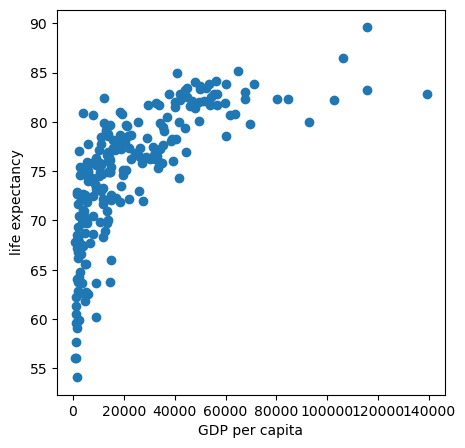

In [21]:
plt.figure(figsize=[5,5])
plt.scatter(x=X,y=y)
plt.xlabel('GDP per capita')
plt.ylabel('life expectancy')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(X,y)

LinearRegression()

In [27]:
predictions = reg.predict(X)

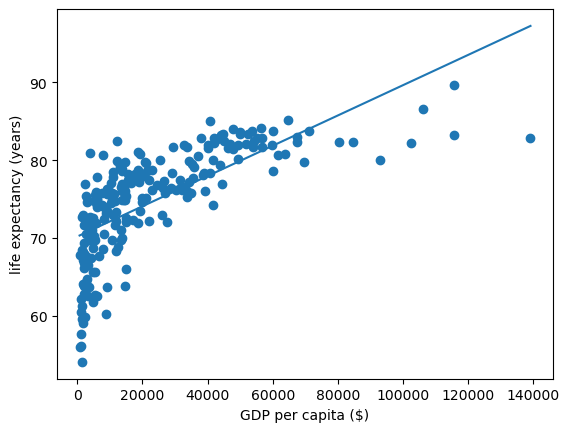

In [29]:
plt.scatter(X,y)
plt.plot(X, predictions)
plt.ylabel("life expectancy (years)")
plt.xlabel("GDP per capita ($)")
plt.show()